In [19]:
import DataUtils as du
import numpy as np
from SectionUtils import *
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import pandas as pd
import random

In [20]:
#tworzenie zbiory danych dwu wymiarowych x_train oraz y_train za pomocą funkcji make_blobs z sklearn.datasets.
#Jest w tym zbiorze danych 500 punktów otoczonych wokół jednego centrum, które zostały stworzone w oparciu o jedno odchylenie standardowe
x_train, y_train = make_blobs(n_samples=500, centers=1, random_state=42, cluster_std=1.0)

In [21]:
#skalowanie danych Standardowym skalowaniem z biblioteki sklearn.preprocesing
x_train = du.DataUtils.normalize_data(x_train)

In [22]:
# #aplikowanie metody LOF
# x_train = du.DataUtils.remove_outliers_lof(x_train)

In [23]:
#przesunięcie danych do środka masy
x_train = du.DataUtils.shift_to_mass_center(x_train)

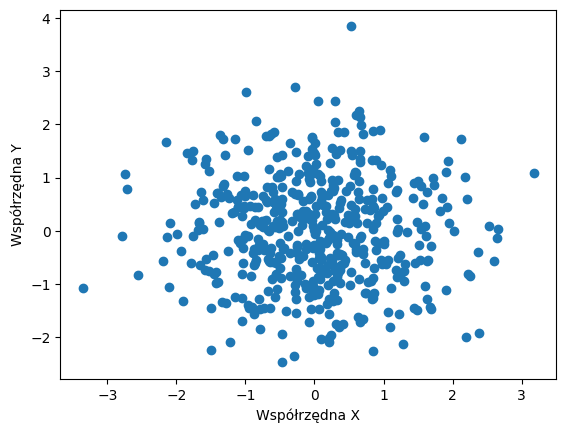

In [24]:
x_train = np.array(x_train)
no_generate = x_train

plt.scatter(x_train[:, 0], x_train[:, 1])
#oznaczanie osi
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

In [25]:
#tworzenie tablicy z elementami klasy Coordinate
x_train = du.DataUtils.listed_class(x_train)

In [26]:
du.DataUtils.setPhiShift(x_train)

0.0

In [27]:
section_count = 7
sectionGroup = SectionGroup(x_train, section_count)

sections = [Section(sectionGroup, i) for i in range(section_count)]
    
ic(sectionGroup.count)

global_points_gen = 1000

section_size_sum = 0

for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]


    for subsection in subsections:
        gen_pts = subsection.generate_subsection_points(sectionGroup.count, global_points_gen)
        subsection.concatenate_points_subsection(gen_pts)

    section.refresh_subsections(subsections)
    section_size_sum += section.count

sectionGroup.refresh_sections(sections)

ic(sectionGroup.count)

print(co.Coordinate.shiftPhi)

ic| sectionGroup.count: 500
ic| sectionGroup.count: 1500


0.0


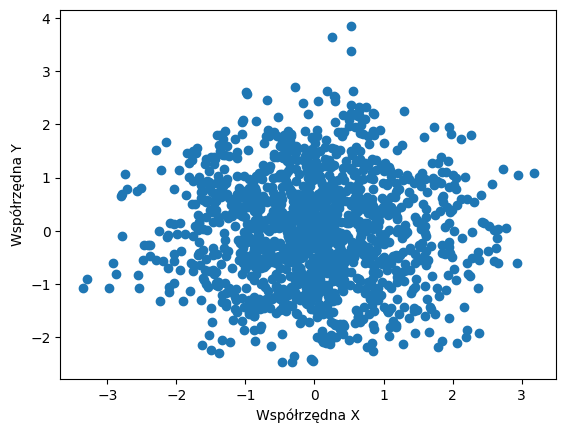

In [28]:
points_array1 = [point.getXY() for point in x_train]
points_array1 = np.array(points_array1)
plt.scatter(points_array1[:, 0], points_array1[:, 1])
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

In [29]:
co.Coordinate.shiftPhi = 0

In [30]:
print(x_train[0].getPhi())

0.3310328683515573


In [31]:
# Extract coordinates from points
print(x_train[485])

In [32]:
points_array = [point.getXY() for point in x_train]

In [33]:
print(points_array)

[[3.1756391218016606, 1.0914015073703838], [-0.18841529662441853, -0.8424447980864692], [-0.4932054651678478, 1.0605221199174102], [-0.019532082310815164, -1.104019165091715], [0.6007785039977687, 2.1712016945883845], [0.3778968664617276, -0.6465142956514051], [-1.0450444195303887, -1.26180016724152], [0.2520872021913634, 1.553093590538573], [2.6533141855976803, 0.022213214532500584], [-1.0197209988657017, 0.42845392467706894], [-1.2364895970155585, 0.6245236537134726], [-0.35253265568249054, 1.6454245171626274], [0.9239171110638322, 0.27236059364112936], [-0.8732210806950901, -0.641883502642878], [1.7152499761462079, 0.9853203992397027], [1.7376374018645193, 0.8514845671268259], [0.2938210109553162, 2.0551885642323438], [0.8944954010934054, -0.3662374706126855], [0.8443007778330825, -1.2685106348967827], [1.4894904119649428, 0.1606934451963822], [2.0244480018387954, -0.0019411901245803345], [0.33668869955677744, 0.9461720845433889], [-1.665432106495671, 0.16765984913432688], [-0.04145

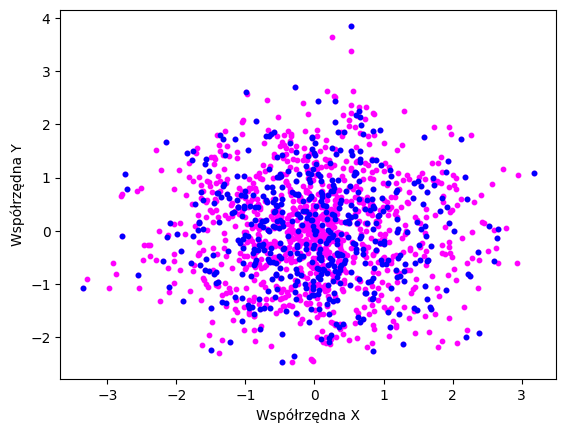

In [34]:
points_array = np.array(points_array)
plt.scatter(points_array[:, 0], points_array[:, 1], color='magenta', s=10)
plt.scatter(no_generate[:, 0], no_generate[:, 1], color = 'blue', s=10)
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

In [35]:
points_array_polar = [[point.getPhi(), point.getR()] for point in x_train]

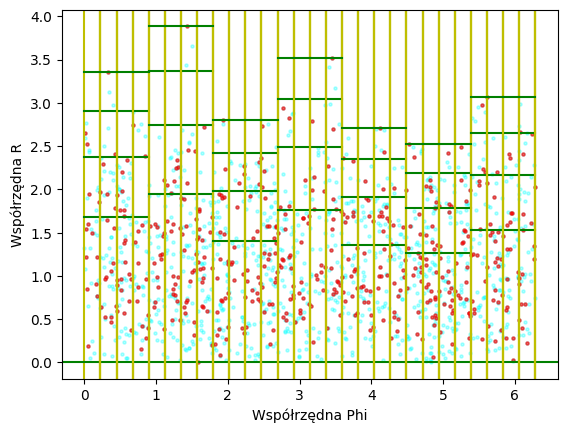

In [36]:
points_array_polar = np.array(points_array_polar)
no_generate = du.DataUtils.listed_class(no_generate)
points_polar_no_generate = [[point.getPhi(), point.getR()] for point in no_generate]
points_polar_no_generate = np.array(points_polar_no_generate)
plt.scatter(points_array_polar[:, 0], points_array_polar[:, 1], color='cyan', s=5, alpha=0.3)
plt.scatter(points_polar_no_generate[:, 0], points_polar_no_generate[:, 1], color='red', s=5, alpha=0.6)
plt.axvline(x=0, color='y')
plt.axhline(y=0, color='g')

du.DataUtils.setPhiShift(x_train)

for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        plt.axvline(x=subsection.phi_range[1], color='y')
        x_range = np.linspace(subsection.phi_range[0], subsection.phi_range[1])
        y_value = np.ones_like(x_range) * subsection.r_range[1]
        
        plt.plot(x_range, y_value, color='g')

plt.xlabel("Współrzędna Phi")
plt.ylabel("Współrzędna R")
plt.show()